In [8]:
import sys
import numpy as np
from pylab import *
from scipy import *
import matplotlib.pyplot as plt
# Specific imports
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pandas as pd
import csv

Bifurcation diagram

In [2]:
bT = pd.read_table("b.mu", skiprows=17, sep='\\s+', header=None)
bT = bT.apply(pd.to_numeric, errors='coerce')

Plotting solution from s.XXX file

In [3]:
fl = pd.read_table("s.mu", nrows=0, sep='\\s+')
lst = list(fl)
con = [float(x) for x in lst]
con = [int(x) for x in con]
ibr = int(con[0]) #the index of the branch
ntot = con[1] #the index of the point
itp = con[2] #the type of point
lab = con[3] #the label of the point
nfpr = con[4] #the number of free parameters used in the computation
isw = con[5] #the value of isw used in the computation
ntpl = con[6] #the number of points in the time interval [0,1]
nar = con[7] #the number of values written per point
nrowpr = con[8] #the number of lines printed following the identifying line
ntst = con[9] #the number of time intervals used in the discretization
ncol = con[10] #the number of collocation points used
nparx = con[11] #the dimension of the array par

In [4]:
n = 100
array_points = [10, 50, 100, 200, 400, 600, 1000, 1500, 2000, 2500, 3000]
ii = 0
xval = []
yval = []
index_boundary_layer = []

for ind in array_points:
    linewidth = 1.0
    linestyle = "-"
    df1 = pd.read_csv("s.mu", header=None, skiprows=ind*nrowpr+ind+1, nrows=ntpl-1, sep='\\s+')
    ii += 1
    
    gval = int(np.round(bT[4].tolist()[ind]))
    renorm = (gval/300)**(1/3)
    for j in range(1,int(len(df1[2].tolist())/2)):
        if np.abs((df1[2].tolist())[j]) <  0.25 * np.abs((df1[2].tolist())[0]):
            index_boundary_layer.append(j)
            xval.append(int(np.round(bT[4].tolist()[ind])))
            yval.append((df1[5].tolist())[j])
            break

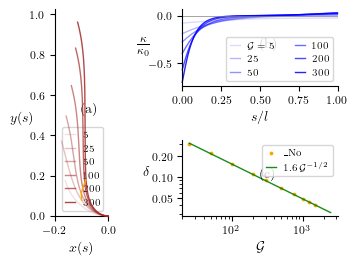

In [5]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc("font", family="Roboto Condensed")
plt.rc("xtick", labelsize="large")
plt.rc("ytick", labelsize="large")
params = {'text.usetex': True, 'text.latex.preamble': r'\usepackage{amsmath}', 'text.latex.preamble': r'\usepackage{bm}'}
plt.rcParams.update(params)

axis_label_size = 10
tick_size = 8
legend_size = 7
line_thickness = 1.0


fig = plt.figure(figsize = (9.6/2.54,7/2.54))
gs = GridSpec(2,2)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,1])

ax1.set_aspect(0.75)
ax1.set_xlim([-0.2,0])
ax1.set_ylim([0,1.025])
legend_array = []
array_points = [10, 50, 100, 200, 400, 600]

ii = 0
for ind in array_points:
    gval = int(np.round(bT[4].tolist()[ind]))
    renorm = (gval/300)**(1/3)
    df = pd.read_csv("s.mu", header=None, skiprows=ind*nrowpr+ind+1, nrows=ntpl-1, sep='\\s+')
    ax1.plot(np.array(df[3].tolist())*renorm,np.array(df[4].tolist())*renorm, color = "brown", alpha = (ii+1)/(np.size(array_points)+1),clip_on=False,zorder=ind,linewidth=line_thickness)
    legend_array.append(str(gval))
    ii += 1
    
array_points = [50, 100, 200, 400, 600]
xval_bl = []
yval_bl = []
ii = 0
for ind in array_points:
    gval = int(np.round(bT[4].tolist()[ind]))
    renorm = (gval/300)**(1/3)
    df = pd.read_csv("s.mu", header=None, skiprows=ind*nrowpr+ind+1, nrows=ntpl-1, sep='\\s+')
    xval_bl.append(np.array(df[3].tolist())[index_boundary_layer[ii]]*renorm)
    yval_bl.append(np.array(df[4].tolist())[index_boundary_layer[ii]]*renorm)
    ii+1
ax1.plot(xval_bl,yval_bl, color = "orange",linewidth=line_thickness, zorder=1000)
ax1.legend(legend_array, fontsize=legend_size,loc='lower right', handlelength=1)
ax1.set_xlabel(r'$x(s)$', usetex=True, fontsize=axis_label_size)
ax1.set_ylabel(r"$y(s)$", usetex=True, rotation=0, fontsize=axis_label_size)
ax1.yaxis.set_label_coords(-0.6, 0.44)
ax1.tick_params(axis='both', labelsize=tick_size)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.text(0.5, 0.5, r'(a)', transform=ax1.transAxes,fontsize=axis_label_size)

array_points = [10, 50, 100, 200, 400, 600]

ax2.set_xlim([0.0,1.0])
legend_array_2 = []
ii = 0
for ind in array_points:
    linewidth = 1.0
    linestyle = "-"
    invkappa0 = 0.029
    df1 = pd.read_csv("s.mu", header=None, skiprows=ind*nrowpr+ind+1, nrows=ntpl-1, sep='\\s+')
    ax2.plot(df1[5].tolist(), np.array(df1[2].tolist())*invkappa0, clip_on=False, color = "blue", alpha = (ii+1)/(np.size(array_points)+1), linewidth=line_thickness)
    if ii == 0:
        legend_array_2.append(r'$\mathcal{G} = $ ' + str(int(np.round(bT[4].tolist()[ind]))))
    else:
        legend_array_2.append(str(int(np.round(bT[4].tolist()[ind]))))
    ii += 1  

ax2.set_xlabel(r'$s$', usetex=True, fontsize=axis_label_size)
ax2.set_ylabel(r"$\kappa(s)$", usetex=True, rotation=0, fontsize=axis_label_size)
ax2.yaxis.set_label_coords(-0.25,0.4)
ax2.legend(legend_array_2, fontsize=legend_size,loc='lower right',ncol=2, handlelength=1)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.set_xlabel(r'$s/l$', usetex=True, fontsize=axis_label_size)
ax2.set_ylabel(r'$\frac{\kappa}{\kappa_0}$', usetex=True, rotation=0, fontsize=1.2*axis_label_size)
ax2.axhline(0, color="0.5", linewidth=0.5)
ax2.tick_params(axis='both', which='major', labelsize=tick_size)
ax2.text(0.5, 0.5, r'(b)', transform=ax2.transAxes,fontsize=axis_label_size)

ax3.scatter(xval,yval, color = 'orange', s = 3)
xvalana = np.linspace(25,2500)#750)
ax3.plot(xvalana, 1.55*(np.array(xvalana)**(-1/2)), color = 'green', linewidth=line_thickness, alpha = 0.9)
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_xlabel(r'$\mathcal{G}$', usetex=True, fontsize=25)
ax3.set_ylabel(r"$\delta$", usetex=True, rotation=0, fontsize=25)
ax3.legend(['_No', r'$1.6 \,\mathcal{G}^{-1/2}$'], fontsize=legend_size,loc='upper right', handlelength=1)
ax3.set_xlabel(r'$\mathcal{G}$', usetex=True, fontsize=axis_label_size)
ax3.set_ylabel(r'$\delta$', usetex=True, fontsize=axis_label_size, rotation = 0)
ax2.yaxis.set_label_coords(-0.25,0.4)
ax3.set_yticks([0.05, 0.1, 0.2])
ax3.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax3.tick_params(axis='both', which = 'both',labelsize=tick_size)
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.text(0.5, 0.5, r'(c)', transform=ax3.transAxes,fontsize=axis_label_size)

plt.tight_layout()
plt.savefig("combined_scatter.svg",transparent=True) 
plt.show()

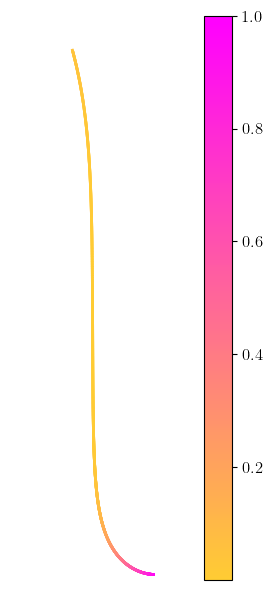

In [6]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc("font", family="Roboto Condensed")
plt.rc("xtick", labelsize="large")
plt.rc("ytick", labelsize="large")
params = {'text.usetex': True, 'text.latex.preamble': r'\usepackage{amsmath}', 'text.latex.preamble': r'\usepackage{bm}'}
plt.rcParams.update(params)

def truncated_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('spring_r')
n_Reds = truncated_colormap(cmap,0.2,1)

def plot_colourline(x,y,c):
    col = n_Reds((c-np.min(c))/(np.max(c)-np.min(c)))
    ax = plt.gca()
    for i in np.arange(len(x)-1):
        ax.plot([x[i],x[i+1]], [y[i],y[i+1]], c=col[i],linewidth=2*line_thickness)
    im = ax.scatter(x, y, c=c, s=0, cmap=n_Reds)
    return im

df = pd.read_csv("s.mu", header=None, skiprows=600*nrowpr+600+1, nrows=ntpl-1, sep='\\s+')
invkappa0 = 0.029

fig = plt.figure(1, figsize=(10,6))
ax  = fig.add_subplot(111)
ax.set_aspect(0.75)
ax.set_xlim([-0.2,0])
ax.set_ylim([-0.01,1.025])
x = np.array(df[3].tolist())*renorm
y = np.array(df[4].tolist())*renorm
z = np.abs(np.array(df1[2].tolist())*invkappa0)
im = plot_colourline(x,y,z/np.max(z))
fig.colorbar(im)
plt.axis('off')
plt.tight_layout()
plt.savefig("colored_snake.svg",dpi=600)
plt.show()